In [69]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
data = pd.read_csv('Wine.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [71]:
data.shape

(178, 13)

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [73]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [74]:
# EDA

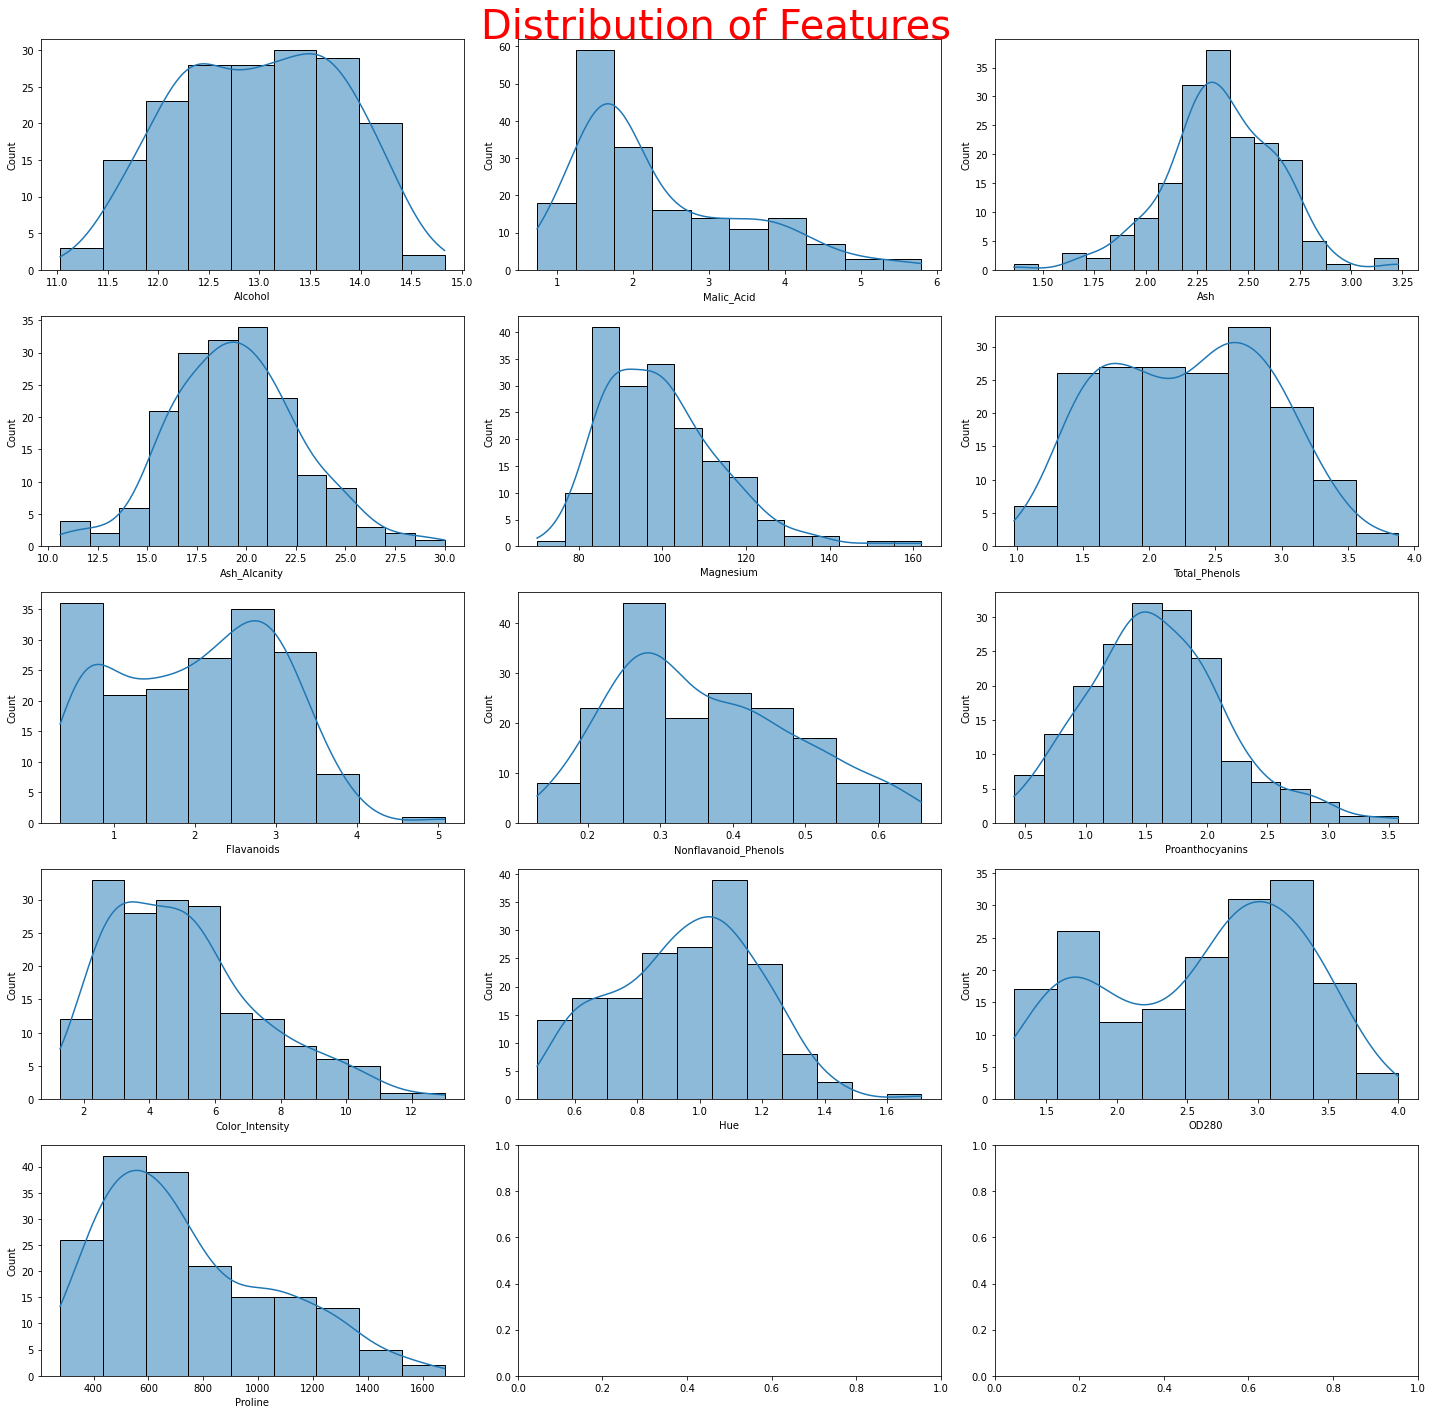

In [75]:
# Distribution of features

fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(20,20))
ax = ax.flatten()
for x, column in enumerate(data.columns):
    sns.histplot(data[column], ax=ax[x], kde=True)
plt.suptitle('Distribution of Features', fontsize=40, color='red')
plt.tight_layout()
plt.show()

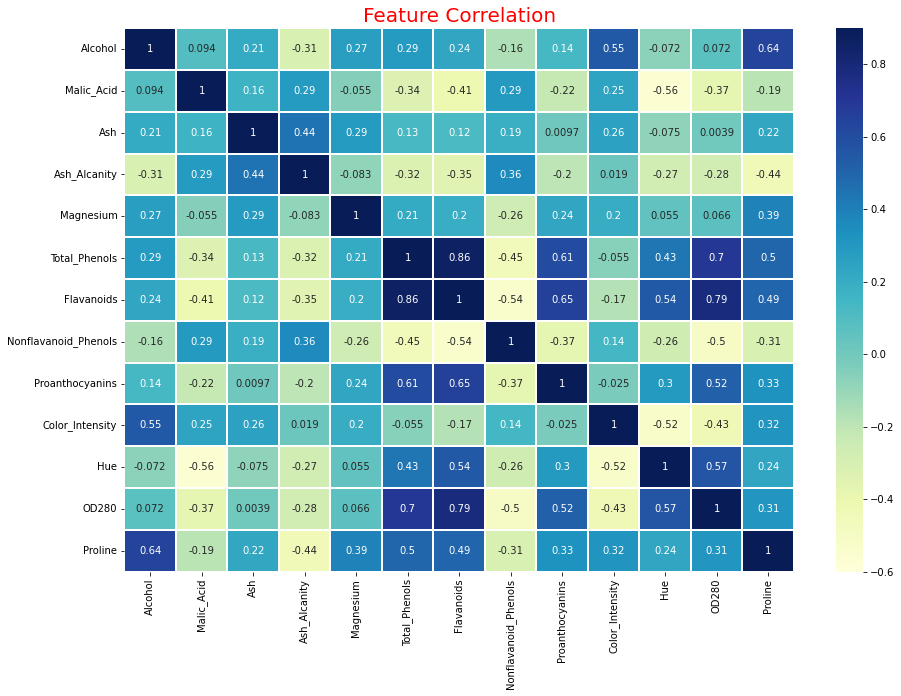

In [76]:
# Correlation among features

plt.figure(figsize=(15,10))
sns.heatmap(data=data.corr(), vmin=-0.6, vmax=0.9, annot=True, linewidth=0.2, cmap='YlGnBu')
plt.title('Feature Correlation', fontsize=20, color='red')
plt.show()

# Preprocessing

In [77]:
# checking for duplicates
data.duplicated().sum()

0

In [78]:
# checking null values
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

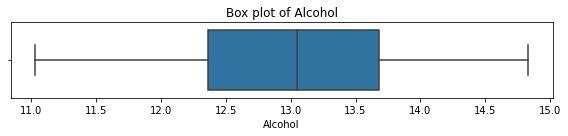

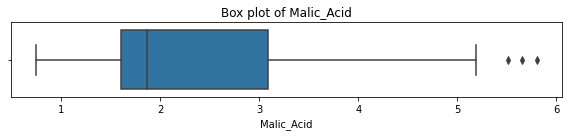

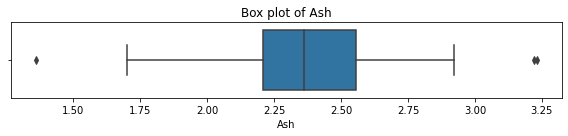

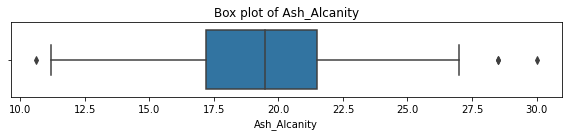

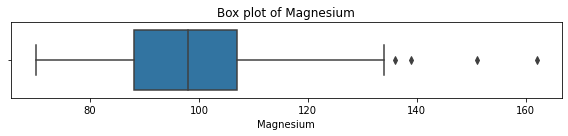

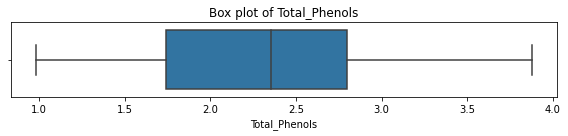

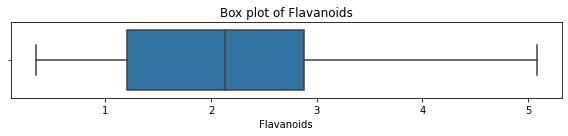

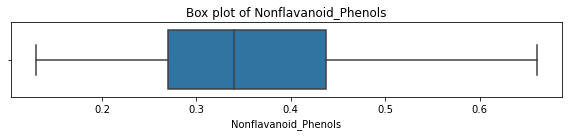

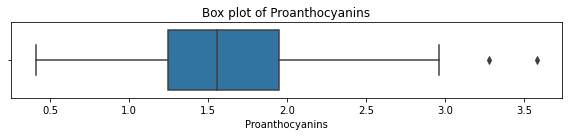

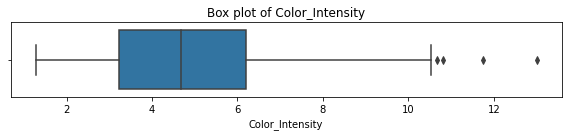

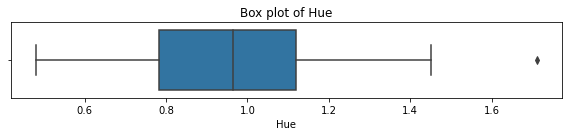

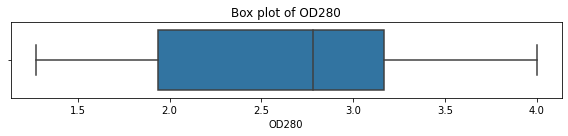

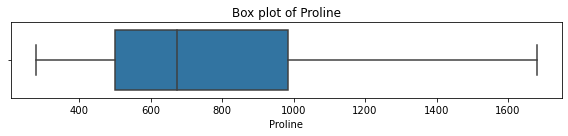

In [79]:
# checking for outliers using boxplot

for column in data.columns:
    plt.figure(figsize=(8,2))
    sns.boxplot(x=data[column])
    plt.title('Box plot of {}'.format(column))
    plt.tight_layout()
    plt.show()

In [80]:
# standard scaling

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

d1=data.copy()
columns = d1.columns

data_std = std_scaler.fit_transform(d1)
data_std = pd.DataFrame(data_std, columns=columns)

data_std.describe()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.122697e-17,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


# PCA with Standardised Data

In [81]:
from sklearn.decomposition import PCA
pca = PCA(0.95) #to find the no. of principal components which could explain 95% of data
pca.fit(data_std)
data_std_pca = pca.transform(data_std)
print('Total number of Principal Components: ',pca.n_components_)

Total number of Principal Components:  10


In [82]:
labels = ['PC' + str(x) for x in range(1,11)]
df_std_pca = pd.DataFrame(data_std_pca, columns=labels)
df_std_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366


In [83]:
# For visualisation purposes we are reducing its dimension to 2 and make it "plottable" in a cartesian plane.

pca2 = PCA(2)
pca2_result = pca2.fit_transform(data_std)
cum_var = np.sum(pca2.explained_variance_ratio_*100)
print('Cumulative variance explained by 2 principal components: ',cum_var.round(2))

Cumulative variance explained by 2 principal components:  55.41


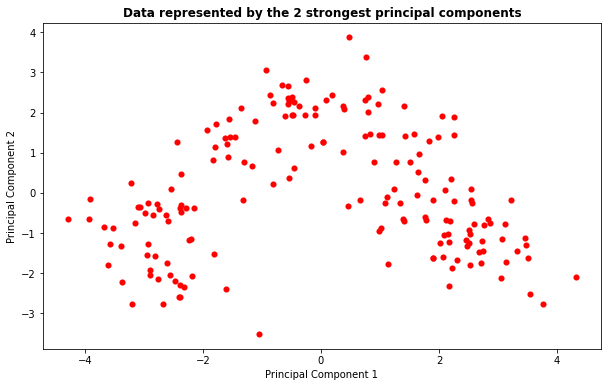

In [84]:
# data represented by two strongest principal components
plt.figure(figsize=(10,6))
plt.scatter(x=pca2_result[:, 0], y=pca2_result[:, 1], color='red', lw=0.1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data represented by the 2 strongest principal components',fontweight='bold')
plt.show()

# Model Implimentation
K-Means Clustering

In [85]:
#importing KMeans

from sklearn.cluster import KMeans

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

2313.9999999999986
1659.0079672511504
1277.928488844643
1175.7051928197127
1104.861683962532
1042.3872037251417
988.0533283180057
940.708165089653
902.0783170433883
866.7991687164842


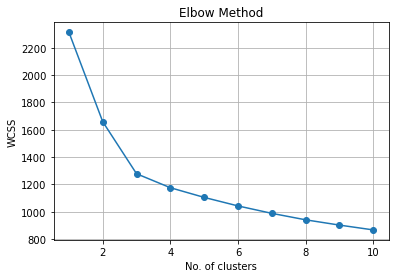

In [86]:
# Finding optimum number of clusters using Elbow Method

wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_std)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

[0.268, 0.285, 0.252, 0.227, 0.196, 0.209, 0.136, 0.146, 0.134]


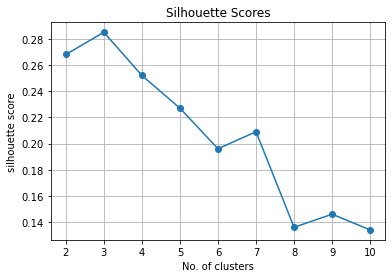

In [87]:
# validating optimum number of clustering using Silhouette score

scores = []
from sklearn.metrics import silhouette_score
for k in range(2,11):
    kmeans=KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data_std)
    scores.append(silhouette_score(data_std, kmeans.labels_).round(3))
print(scores)

plt.plot(range(2,11), scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('No. of clusters')
plt.ylabel('silhouette score')
plt.grid()
plt.show()

# KMeans Clustering Model with 3 clusters

In [88]:
kmeans=KMeans(n_clusters=3, init='k-means++', random_state=42)
clst_labels = kmeans.fit_predict(data_std)
clst_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [89]:
# value count of items in different clusters
pd.Series(clst_labels).value_counts()

2    65
1    62
0    51
dtype: int64

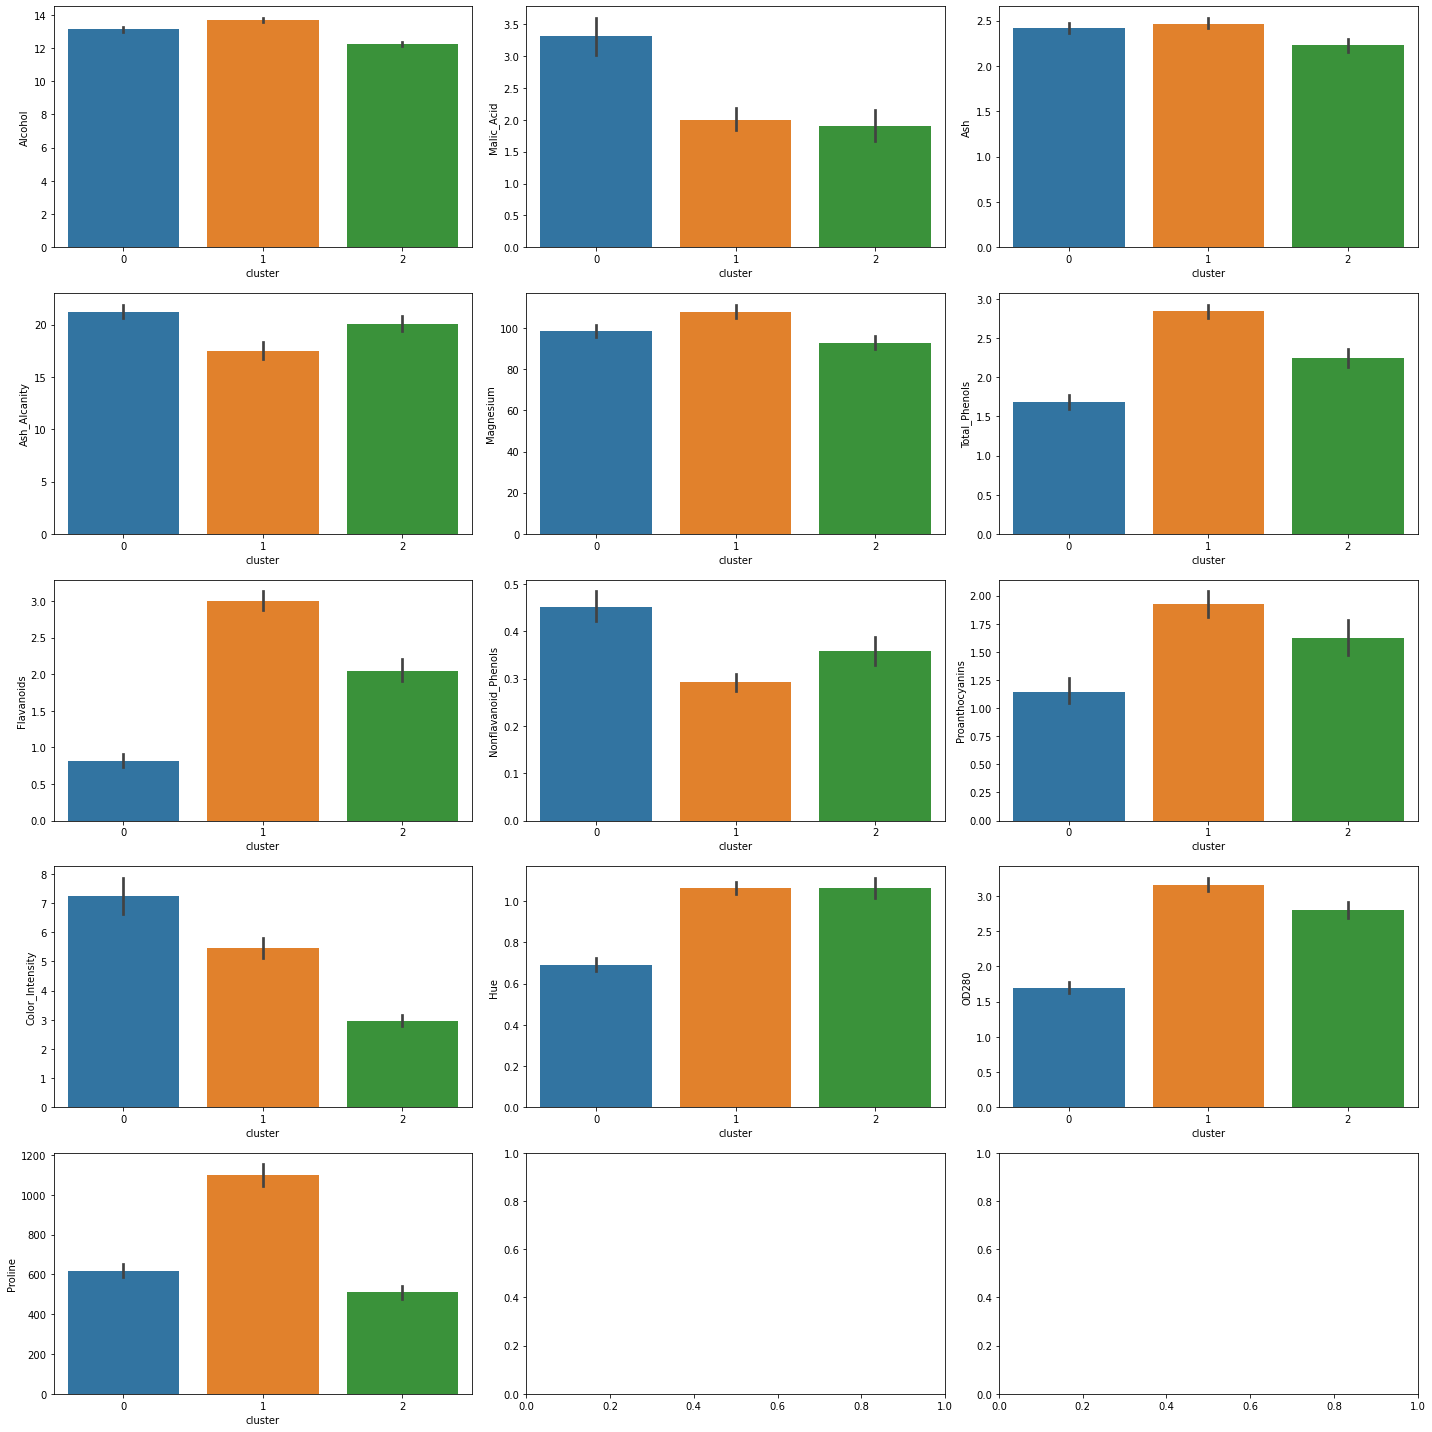

In [90]:
#adding cluster to dataset
d1['cluster'] = clst_labels

# visualizing charecteristics of each cluster
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(20,20))
ax = ax.flatten()
for x, column in enumerate(data.columns):
    sns.barplot(x=d1['cluster'], y=d1[column], ax=ax[x])
plt.tight_layout()
plt.show()

In [91]:
# cluster charecteristics

clst_charec = d1.groupby(['cluster']).mean()
clst_charec.T

cluster,0,1,2
Alcohol,13.134118,13.676774,12.250923
Malic_Acid,3.307255,1.997903,1.897385
Ash,2.417647,2.466290,2.231231
Ash_Alcanity,21.241176,17.462903,20.063077
Magnesium,98.666667,107.967742,92.738462
Total_Phenols,1.683922,2.847581,2.247692
Flavanoids,0.818824,3.003226,2.050000
Nonflavanoid_Phenols,0.451961,0.292097,0.357692
Proanthocyanins,1.145882,1.922097,1.624154
Color_Intensity,7.234706,5.453548,2.973077


# PCA Cluster Visualisation

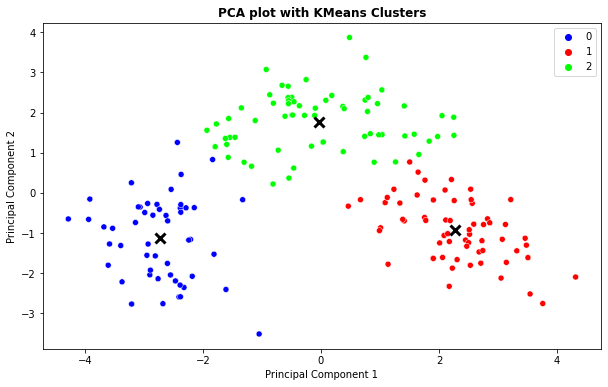

In [92]:
#cluster centroids
centroids = kmeans.cluster_centers_

#transforming centroids using pca2
centroids_pca = pca2.transform(centroids)

#visualising using scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=pca2_result[:, 0], y=pca2_result[:, 1], hue=clst_labels, palette='brg')
plt.scatter(x=centroids_pca[:,0], y=centroids_pca[:,1], marker='x', color='black', s=100, linewidths=3)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA plot with KMeans Clusters',fontweight='bold')
plt.show()

# Agglomerative Hierarchial Clustering

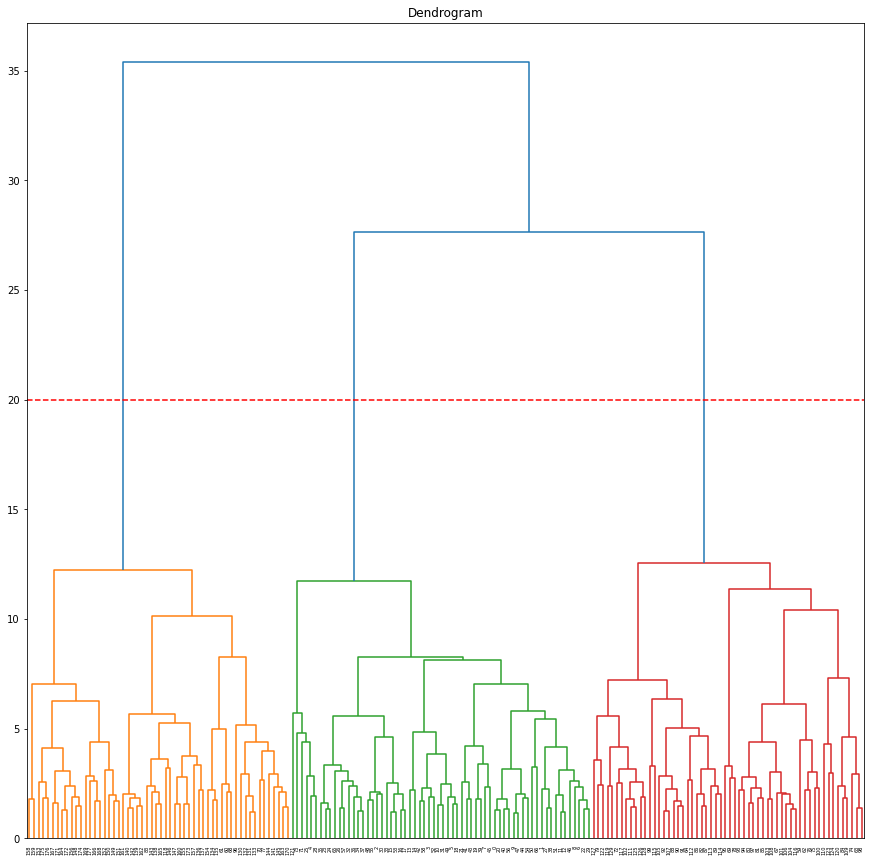

In [93]:
# determining optimum number of clusters using dendrogram

import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,15))
dendrogram = sch.dendrogram(sch.linkage(data_std, method='ward'))
plt.hlines(20,0,3000, colors='red', linestyles='dashed')
plt.title('Dendrogram')
plt.show()

In [94]:
# Performing HAC with no. of clusters as 3

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clst_hc = hc.fit_predict(data_std)
clst_hc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [95]:
# value counts of different clusters
pd.Series(clst_hc).value_counts()

2    64
0    58
1    56
dtype: int64

In [96]:
# adding cluster column
d2=data.copy()
d2['cluster'] = clst_hc

# cluster charecteristics
clst_charec_hc = d2.groupby(['cluster']).mean()
clst_charec_hc.T

cluster,0,1,2
Alcohol,12.203966,13.061607,13.669219
Malic_Acid,1.938966,3.166607,1.970000
Ash,2.215172,2.412857,2.463125
Ash_Alcanity,20.208621,21.003571,17.528125
Magnesium,92.551724,99.857143,106.156250
Total_Phenols,2.262931,1.694286,2.850000
Flavanoids,2.088103,0.847857,3.009688
Nonflavanoid_Phenols,0.355345,0.449464,0.291094
Proanthocyanins,1.686552,1.129286,1.908125
Color_Intensity,2.895345,6.850179,5.450000


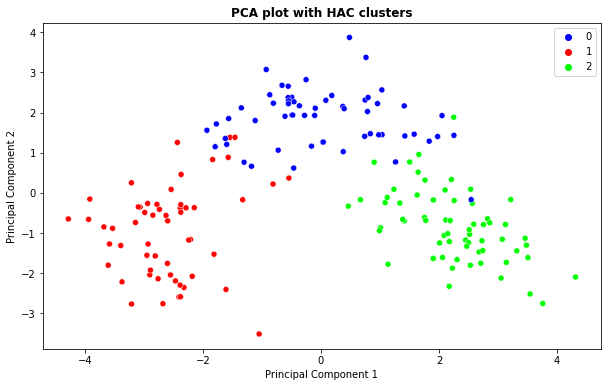

In [97]:
#visualising using scatter plot

plt.figure(figsize=(10,6))
sns.scatterplot(x=pca2_result[:, 0], y=pca2_result[:, 1], hue=clst_hc, palette='brg')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA plot with HAC clusters',fontweight='bold')
plt.show()


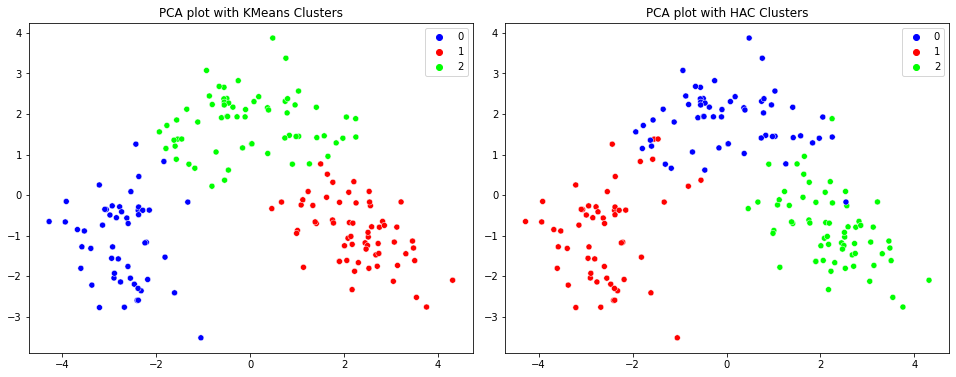

In [98]:
### Comparison of PCA plots

plt.figure(figsize=(20,20))

plt.subplot(4,3,1)
sns.scatterplot(x=pca2_result[:, 0], y=pca2_result[:, 1], hue=clst_labels, palette='brg')
plt.title('PCA plot with KMeans Clusters')

plt.subplot(4,3,2)
sns.scatterplot(x=pca2_result[:, 0], y=pca2_result[:, 1], hue=clst_hc, palette='brg')
plt.title('PCA plot with HAC Clusters')

plt.tight_layout()
plt.show()

# Conclusion:

In [99]:
#### Adding cluster to original dataset
data['cluster'] = clst_labels
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


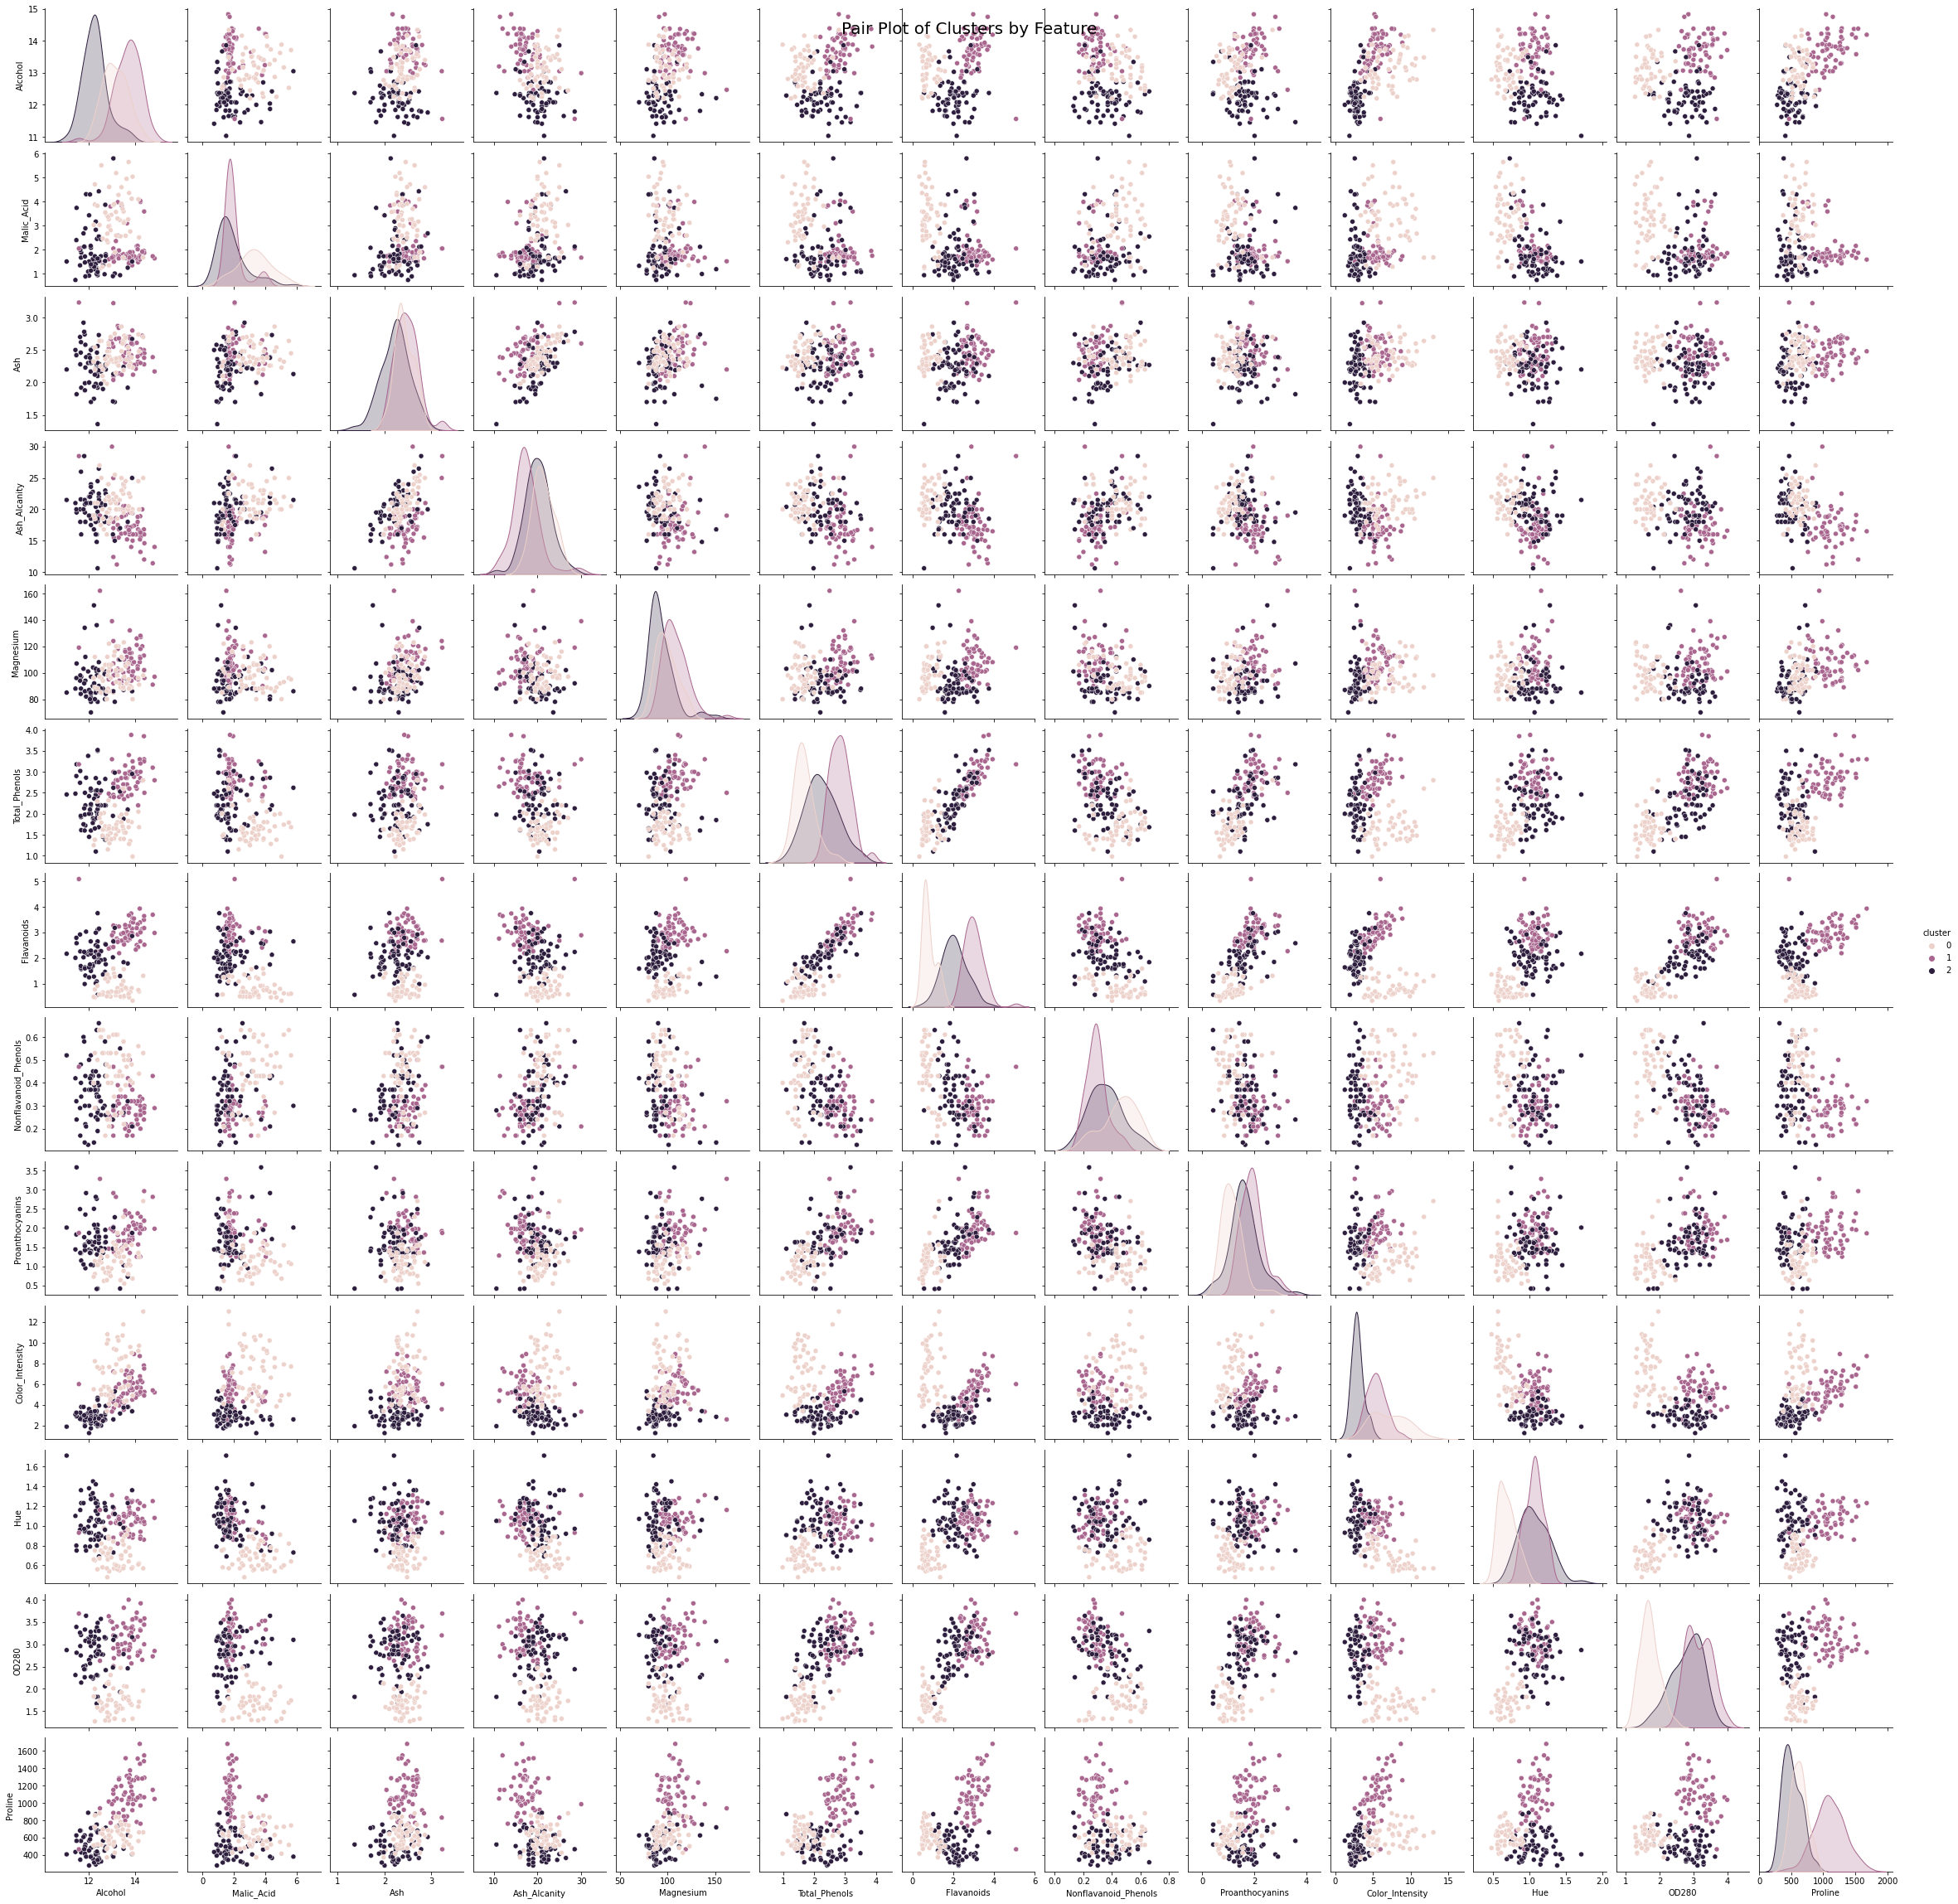

In [100]:
sns.pairplot(data, hue="cluster")
plt.suptitle('Pair Plot of Clusters by Feature', size = 20)
plt.show()